In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [19]:
X,y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

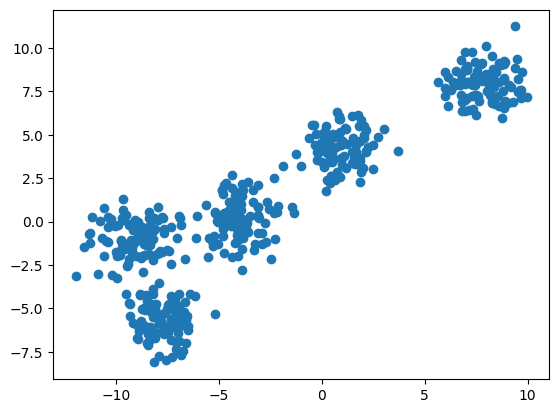

In [20]:
plt.scatter(X[:,0], X[:, 1])

In [21]:
k = 5
colors = ["green", "red", "blue", "yellow", "orange"]
clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        "Center":center,
        "Color" : colors[i],
        "Points" : points
    }

    clusters[i] = cluster

In [22]:
clusters

{0: {'Center': array([ 4.40684691, -9.14312778]),
  'Color': 'green',
  'Points': []},
 1: {'Center': array([ 8.07588151, -4.22058109]),
  'Color': 'red',
  'Points': []},
 2: {'Center': array([ 8.41525323, -3.53849809]),
  'Color': 'blue',
  'Points': []},
 3: {'Center': array([-7.40827375,  0.532983  ]),
  'Color': 'yellow',
  'Points': []},
 4: {'Center': array([5.56213893, 8.45063665]),
  'Color': 'orange',
  'Points': []}}

In [6]:
def distance_cal(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [18]:
def assignpoints(clusters): #e-step
    for i in range(X.shape[0]):
        dist = []
        curr_x = X[i]
        for j in range(k):
            d = distance_cal(curr_x, clusters[j]["Center"])
            dist.append(d)
        current_cluster = np.argmin(dist)
        clusters[current_cluster]["Points"].append(curr_x)
def update(clusters):#m-step
    for i in range(k):
        pts = np.array(clusters[i]["Points"])
        if pts.shape[0] > 0:
            new_u = pts.mean(axis=0)
            clusters[i]["Center"] = new_u
            clusters[i]["Points"] = []


def plotclusters(clusters):
    for i in range(k):
        print(len(clusters[i]['Points']))
        pts = np.array(clusters[i]["Points"])
        try:
            plt.scatter(pts[:,0], pts[:,1],color=clusters[i]["Color"])
        except:
            pass
        u = clusters[i]["Center"]
        plt.scatter(u[0], u[1], color="black", marker="*")

        


In [23]:
assignpoints(clusters=clusters)

0
0
0
306
194


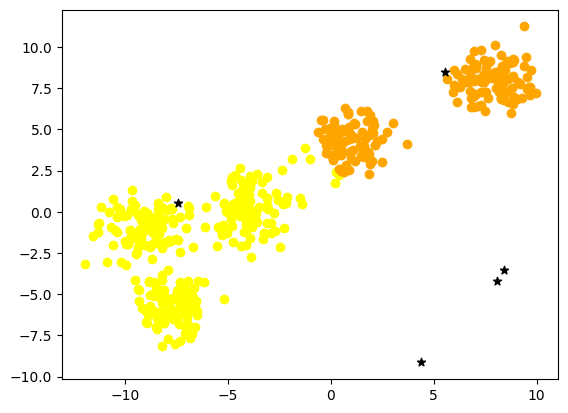

In [24]:
plotclusters(clusters)

In [25]:
update(clusters)

In [27]:
assignpoints(clusters)

0
0
0
300
200


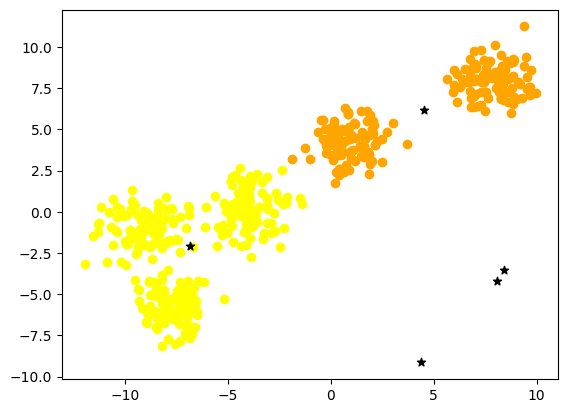

In [28]:
plotclusters(clusters)

In [29]:
update(clusters)

In [30]:
assignpoints(clusters)

0
0
0
300
200


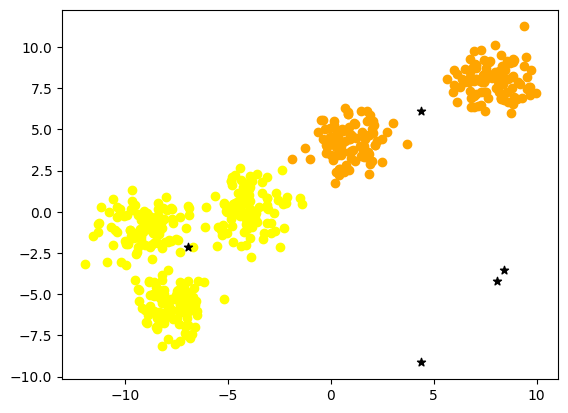

In [31]:
plotclusters(clusters)